Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn import tree

Đọc File

In [2]:
filename ="Adidas US Sales Datasets.xlsx"
df = pd.read_excel(filename)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


Cleaning Data

In [3]:
df = df.drop(df.index[0:3]) #xóa đi 3 dòng đầu tiên
df.drop("Unnamed: 0", axis = 1, inplace = True) #drop cột đầu tiên
df.columns = df.iloc[0] #Thay đổi tên các cột
df = df.drop(df.index[0]) #Bỏ hàng đầu tiên vì nó chứa tên cột
df = df.reset_index(drop=True) #Đặt lại chỉ mục và xóa chỉ mục hiện có 
df.duplicated().sum() #Kiểm tra xem tập dữ liệu có giá trị trùng lặp hay không

0

In [4]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [6]:
df['Invoice Date']=pd.to_datetime(df['Invoice Date']) #Thay đổi kiểu dữ liệu của Ngày lập hóa đơn thành datetime

In [7]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=3)

In [8]:
df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit', 'Operating Margin']] = df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit', 'Operating Margin']].astype("float")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 980.0+ KB


In [10]:
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month
df['Day'] = df['Invoice Date'].dt.day

In [11]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Day
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1,2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1,3
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020,1,4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,1,5


MACHINE LEARNING

Sử dụng hồi quy tuyến tính để dự đoán lợi nhuận

In [44]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [45]:
X = df[['Units Sold','Total Sales','Operating Margin','Price per Unit']] #đặc trưng
y = df['Operating Profit'] # mục tiêu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #chia dữ liệu thành bộ huấn luyện và bộ kiểm tra
#75% dữ liệu được sử dụng để huấn luyện (X_train, y_train), và 25% được sử dụng để kiểm tra (X_test, y_test)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
y_predicted

array([  4290.8307882 ,  12552.69774818,  69263.50827552, ...,
        21327.45551641,  47792.03658834, 165256.52418341])

In [47]:
model.score(X_test,y_test)

0.9395332305632742

In [48]:
rmse(y_test,y_predicted)
plt.plot()

13900.815135332881

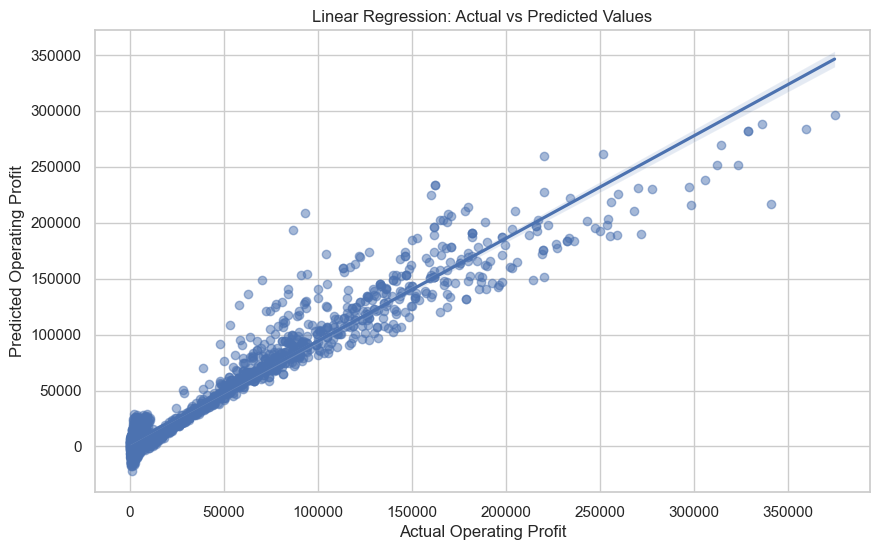

In [55]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Scatter plot of actual vs predicted values with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_predicted, scatter_kws={'alpha':0.5})
plt.title('Linear Regression: Actual vs Predicted Values')
plt.xlabel('Actual Operating Profit')
plt.ylabel('Predicted Operating Profit')
plt.show()

Phương thức model.score tính toán điểm R^2 , một đo lường cho việc dự đoán của mô hình so với giá trị thực tế, trên bộ kiểm tra (X_test, y_test). Kết quả sau đó được in ra.
Điểm R^2 = khoảng 0.936 cho thấy mô hình hồi quy tuyến tính của bạn giải thích được khoảng 93.6% sự biến động của 'Total Sales' dựa trên các đặc trưng đã chọn.

Sử dụng cây quyết định để dự đoán lợi nhuận

In [17]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [18]:
#Tạo một mô hình cây quyết dịnh
model = tree.DecisionTreeRegressor() 

#Chọn đặc trưng và mục tiêu
X = df[['Units Sold','Total Sales','Operating Margin','Price per Unit']] #Đặc trưng
y = df['Operating Profit'] # Mục tiêu

#Sử dụng train_test_split để chia dữ liệu thành bộ huấn luyện và bộ kiểm tra. 80% dữ liệu được sử dụng để huấn luyện (X_train, y_train), 
#và 20% để kiểm tra (X_test, y_test). Tham số random_state đảm bảo sự tái tạo của quá trình chia dữ liệu.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
#Huấn luyện mô hình Cây quyết định
model.fit(X_train, y_train)

#Dự đoán
y_predicted = model.predict(X_test)
y_predicted

array([2579.2 , 4054.5 , 1298.88, ..., 2716.6 ,  550.8 , 1231.2 ])

In [20]:
#Đánh giá mô hình bằng R^2 Square
model.score(X_test,y_test)

0.9986791234654218

In [21]:
rmse(y_test,y_predicted)

1951.1985553625793

Phương thức model.score tính toán điểm R^2 , một đo lường cho việc dự đoán của mô hình so với giá trị thực tế, trên bộ kiểm tra (X_test, y_test).
Điểm R^2 = khoảng 0.998 cho thấy mô hình hồi quy tuyến tính của bạn giải thích được khoảng 99.8% sự biến động của 'Operating Profit' dựa trên các đặc trưng đã chọn.

Random Forest Model

In [22]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [23]:
#Chọn đặc trưng và mục tiêu
X = df[['Units Sold','Price per Unit','Total Sales','Operating Margin']] #features
y = df['Operating Profit'] # target

#Sử dụng train_test_split để chia dữ liệu thành bộ huấn luyện và bộ kiểm tra. 80% dữ liệu được sử dụng để huấn luyện (X_train, y_train), 
#và 20% để kiểm tra (X_test, y_test). Tham số random_state đảm bảo sự tái tạo của quá trình chia dữ liệu.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
#Tạo một mô hình Rừng ngẫu nhiên với 5 cây quyết định
model = RandomForestRegressor (n_estimators = 5)

#Huấn luyện mô hình
model.fit(X_train, y_train)

#Dự đoán
y_predicted = model.predict(X_test)
y_predicted

array([2600.23 , 4036.676, 1307.272, ..., 2746.256,  564.6  , 1229.342])

In [25]:
#Đánh giá mô hình bằng R^2 Square
model.score(X_test,y_test)

0.9987934963412545

In [26]:
rmse(y_test,y_predicted)

1864.8103670402697

TRỰC QUAN HÓA DỮ LIỆU

Danh mục sản phẩm bán chạy nhất

In [27]:
Top_prod = df.groupby('Product').agg({"Units Sold" : "sum"}).sort_values(by = "Units Sold", ascending = False).reset_index()
Top_prod

3,Product,Units Sold
0,Men's Street Footwear,593320.0
1,Men's Athletic Footwear,435526.0
2,Women's Apparel,433827.0
3,Women's Street Footwear,392269.0
4,Women's Athletic Footwear,317236.0
5,Men's Apparel,306683.0


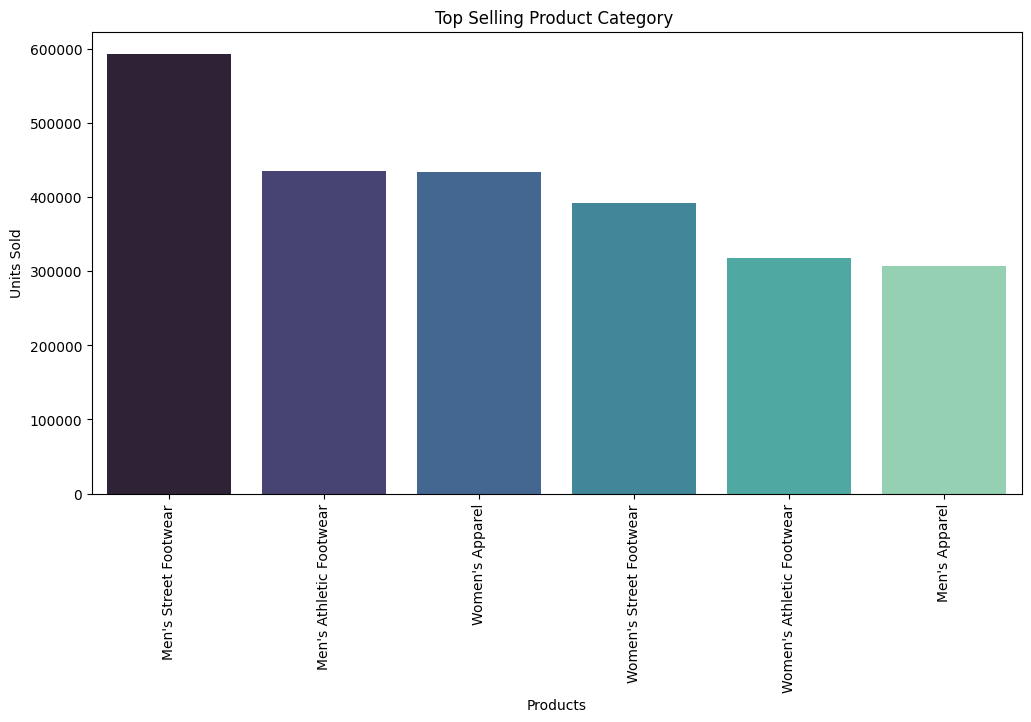

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_prod["Product"], y=Top_prod["Units Sold"], palette = "mako")
plt.title('Top Selling Product Category ')
plt.xlabel('Products')
plt.ylabel('Units Sold')
plt.xticks(rotation = "vertical")
plt.show()

Tổng doanh thu theo khu vực

In [29]:
region_sales = df.groupby('Region').agg({'Total Sales':"sum"}).reset_index()
region_sales

3,Region,Total Sales
0,Midwest,135800459.0
1,Northeast,186324067.0
2,South,144663181.0
3,Southeast,163171236.0
4,West,269943182.0


In [30]:
px.pie(region_sales, values='Total Sales', names='Region', title='Total Sales by Region')

Phần lớn doanh số bán hàng được thực hiện bởi miền Tây, tiếp theo là khu vực Tây Bắc
15,1% doanh số bán hàng được thực hiện bởi khu vực Trung Tây, khiến khu vực này đóng góp nhỏ vào tổng doanh số bán hàng

Top nhà bán lẻ có lợi nhuận cao nhất

In [31]:
top_retailors = df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=False).reset_index()
top_retailors.index += 1
top_retailors

,Retailer,Operating Profit
1,West Gear,85667873.18
2,Foot Locker,80722124.81
3,Sports Direct,74332954.96
4,Kohl's,36811252.58
5,Amazon,28818503.31
6,Walmart,25782052.61


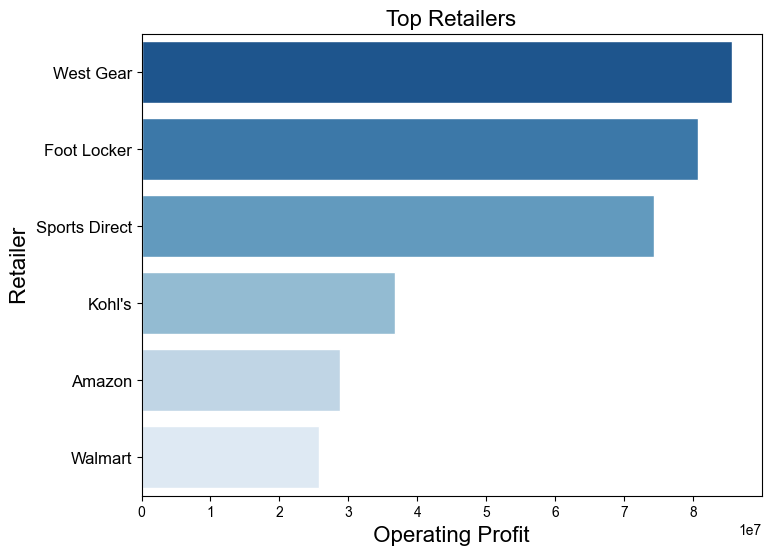

In [32]:
fig , ax = plt.subplots(figsize=(8,6))
sns.set(style='darkgrid')
sns.barplot(data=top_retailors, x='Operating Profit', y='Retailer', palette='Blues_r')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 12)
ax.set_xlabel(' Operating Profit ', fontsize = 16)
ax.set_ylabel(' Retailer ', fontsize = 16)
ax.set_title('Top Retailers', fontsize = 16)
plt.show()

Sơ đồ bán hàng của Adidas theo khu vực và tiểu bang

In [33]:
px.treemap(df, path=['Region', 'State'], values='Total Sales',
                 title='Treemap for Adidas Sales by Region and State')

In [34]:
df_copy = df.copy()


In [35]:
df_copy['Region']=pd.factorize(df_copy.Region)[0]
df_copy['State']=pd.factorize(df_copy.State)[0]
df_copy['City']=pd.factorize(df_copy.City)[0]
df_copy['Product']=pd.factorize(df_copy.Product)[0]
df_copy['Retailer']=pd.factorize(df_copy.Retailer)[0]
df_copy['Sales Method']=pd.factorize(df_copy.Retailer)[0]

<Axes: xlabel='3', ylabel='3'>

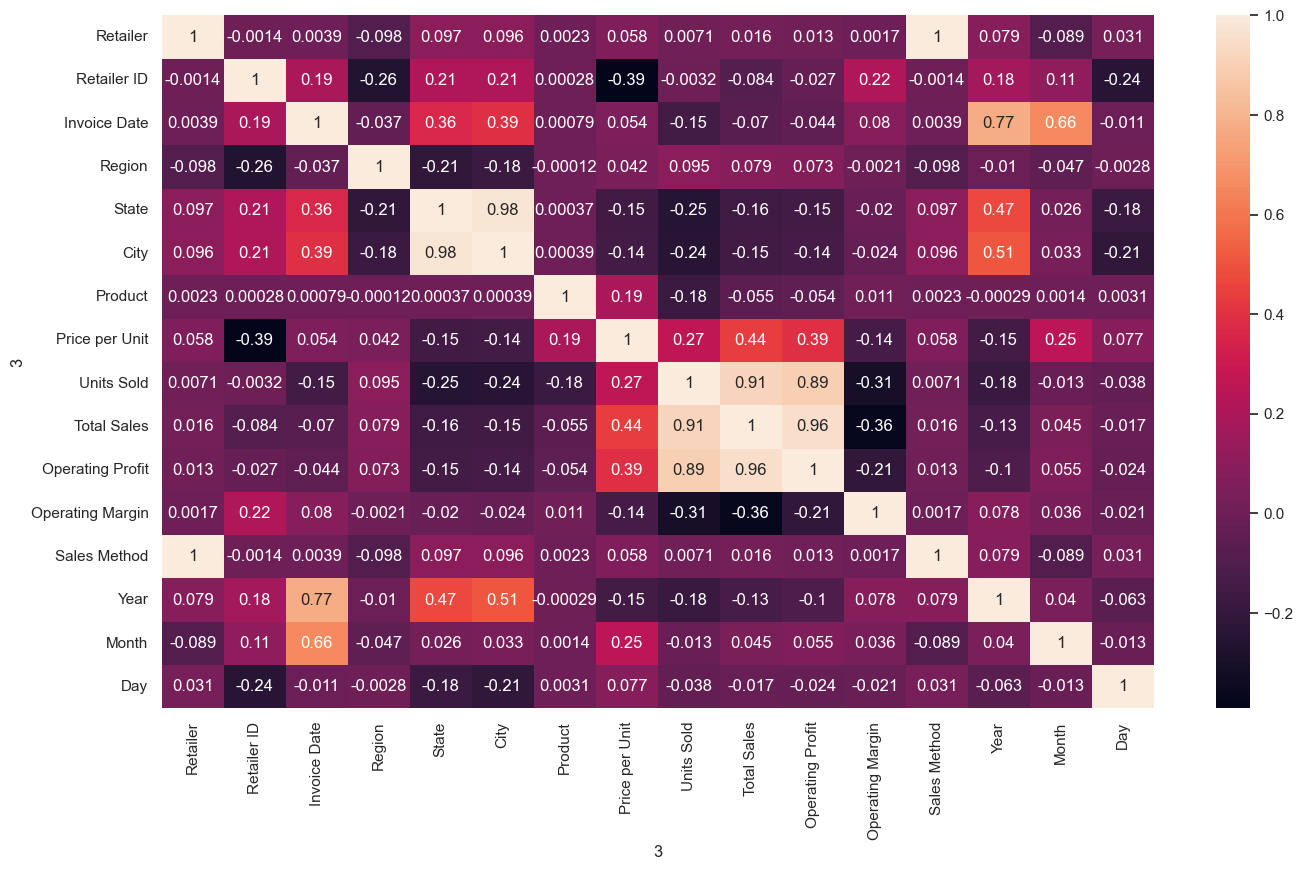

In [36]:
plt.figure(figsize=(16, 9))
sns.heatmap(df_copy.corr(), annot=True)